
# Buckling instability and large deformations of longbows


*Buckling instability* is a sudden change of the shape of a straight
rod that is compressed longitudinally.  Buckling does not happen
until the compressive forces on the road terminals exceed a certain
threshold, called *buckling threshold*.


The buckling threshold of a slender rod, first
determined by Euler, is as follows.
\begin{equation}
    F_B = \frac{\pi^2 E I}{L^2}.
\end{equation}
Here $L$ is the length of the rod, $E$ is the Young’s modulus of the
rod material, and $I$ is the area moment of inertia of the cross
section of the rod. 

 
For a wooden stick of length $L = 1$ m and
circular cross section of diameter $D = 2$ cm, with wood Young’s
modulus $E = 10^{10}$ Pa, the buckling threshold is $F_B = 775$ N,
corresponding to the weight of mass $m = 79$ kg.

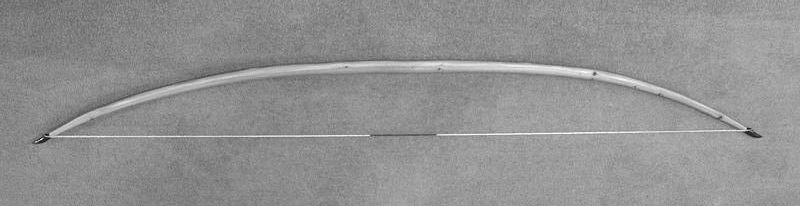


A stringed bow
may be viewed as a straight rod that has been brought beyond the
buckling threshold and is kept in mechanical equilibrium by the
tension in the bowstring. The deflection of the rod
from its non-deformed equilibrium is not small compared to the
dimension of the bow, but the strains in the material are still
small.  This permit us to use the linear elasticity theory to 
analyze large deflections of the bow.

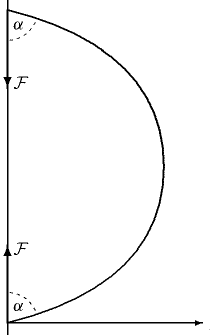

The geometry of a stringed bow with opening angle $\alpha$.

## The results of the analysis of large deflection of slender rods

i.  The deformation of the bow can be described by a single
    parameter - the so called *opening angle*, $\alpha$.  See
    the figure above for the sketch of a bow geometry and the
    definition of opening angle.
    
ii. The tension in the bow string, $F$, measured in units of of
    the buckling threshold, $F_B$, $f(\alpha) = \frac{F}{F_B}$, is as
    follows:
    \begin{equation}
      f(\alpha) = \frac{1}{\pi^2} I_1^2(\alpha)
    \end{equation}
    where
    \begin{equation}
      I_1(\alpha) = \sqrt{2} \int\limits_0^{\alpha}
      \frac{\mathrm{d}x}{\sqrt{\cos(x) - \cos(\alpha)}}.
      \tag{1}
    \end{equation}

iii.The separation between the bow terminals, measured in units of
    the length of the bow, $z = \frac{Z}{L}$, is as follows:
    \begin{equation}
        z(\alpha) = \frac{I_2(\alpha)}{I_1(\alpha)} , 
    \end{equation}
    where
    \begin{equation}
        I_2(\alpha) = \sqrt{2} \int\limits_0^{\alpha}
        \frac{\cos(x) \, \mathrm{d}x}{\sqrt{\cos(x) - \cos(\alpha)}}.
        \tag{2}
    \end{equation}
    
In the formulas above, $\alpha$ is the angle in radians.


The goals of the assignment are:
 
1. Evaluate the integrals Eqs. (1) and (2) numerically. Use the results to plot the following graphs:
 
   (a) the tension in the bow string vs. the bow's opening angle,

   (b) the distance between the bow terminals vs. the bow's opening angle, and

   (c) the tension in the bow string vs. the distance between the bow terminals.
3. Solve nonlinear equation $z(\alpha) = 0$ and determine the opening angle and the tension
   in the bow string that are required to bring the bow terminals together.

#### 0. Install and load required packages.

Comment out the command installing julia packages. (Those commands need to be executed only once but the notebook is expected to be run multiple times.) Do not delete the installation commands.

In [ ]:

using PyPlot
using QuadGK
using Roots


#### 1. Catastrophic cancellations.

The integrals Eqs. (1) and (2) are written in a
form that is not suitable for their numerical evaluations: the factor
$\cos(x) - \cos(\alpha)$ causes catastrophic cancellations in
the denominators of the integrands when $x \to \alpha$.
    


Verify the existance of the problem writing the code to evaluate the integrals as in Eqs. (1) and (2):


Code for $f(\alpha)$:

In [ ]:

I1_bad(alpha) = sqrt(2.0) * quadgk(x -> 1.0/sqrt(cos(x) - cos(alpha)), 0.0, alpha)[1]

f_bad(alpha) = (I1_bad(alpha) / pi)^2;


Code for $z(\alpha)$:

In [ ]:

I2_bad(alpha) = sqrt(2.0) * quadgk(x -> cos(x)/sqrt(cos(x) - cos(alpha)), 0.0, alpha)[1]

z_bad(alpha) = I2_bad(alpha) / I1_bad(alpha);


Parameters for calculations (use at
least 30 data points for your plots):

In [ ]:

np = 30                         # number of integral evaluations
angs = range(5.0, 150.0, np)    # opening angles in degrees
alps = angs/180*pi              # opening angles in radians

Demonstration of the problems:

In [ ]:

f_bad.(alps)  # <- this is going to crash

In [ ]:

z_bad.(alps)  # <- this is going to crash


#### 2.

One way to avoid the catastrophic cancellations, is to rewrite
the integrand in a form that doesn't contain a subtraction of very
close floating point values.    


Rewrite the formulas for $I_1$ and $I_2$ in a form that is free from
catastrophic cancellations. Follow the hints provided in the problem statement.

Write your derivations and the results in the assignment booklet.


#### 3.

Write Julia functions, `I1(alpha)` and `I2(alpha)`, that accept the
value of the opening angle of the bow (in radians), and return the
numerical value of the integral. Use Julia package `QuadGK` for numerical
evaluation of the integrals.

In [ ]:

I1(alpha) = quadgk(you_cancellation-free_code_here, 0.0, alpha)[1]  

In [ ]:

I2(alpha) = quadgk(your_cancellation-free_code_here, 0.0, alpha)[1]  

In [ ]:

f(alpha) = (I1(alpha) / pi)^2

In [ ]:

z(alpha) = I2(alpha) / I1(alpha)


#### 4.

Plot the graphs $f(\alpha)$ for
$5^{\circ} \le \alpha \le 150^{\circ}$ (angle in degrees). 
Provide axes labels, grid, title for your graph.

In [ ]:

# your code here


What is (approximately) the **dimensionless** tension in the bow string for the opening angle $100^{\circ}$? 

What is this value of string tension, in Newtons, for a bow made from the wooden stick that was discussed earlier? 
(All calculations need to be performed in a new cell(s) below.) 


#### 5.

Plot the graphs $f(\alpha)$ for
$5^{\circ} \le \alpha \le 150^{\circ}$ (angle in degrees). 
Provide axes labels, grid, title for your graph.

In [ ]:

# your code here


#### 6.

Plot the graphs $f(z)$, i.e the tension $f(z)$ that is required 
to keep the terminals of the bow at a given dimensionless distance $z$, for
$5^{\circ} \le \alpha \le 150^{\circ}$ (angle in degrees). 
Provide axes labels, grid, title for your graph.

In [ ]:

# your code here


### 7.

Solve nonlinear equation $z(\alpha) = 0$
to find the opening angle that is required to bring the rod terminals together. 
Use the package `Roots` and the method of bisection. Estimate the interval 
containing the root of the equation by visual inspection of the graph $z(\alpha)$.
Convert the interval from degries to radians.

In [ ]:

alpha_below = 120 * pi/180
alpha_above = 140 * pi/180

In [ ]:

beta = find_zero(your_code_here)

In [ ]:
dimensionless_tension = f(beta)


Determine the value of tension in the string, in
Newtons, that is required to bring the rod terminals together.
(All calculations need to be performed in a new cell(s) below.)